<a href="https://colab.research.google.com/github/ujjwalroyal14/CautiousSpeak/blob/main/Hate_speech%C2%A0detection_using_ML_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hate Speech Detection using ML classifiers**

# **ML classifiers vs Neural Network**

Insatlling necesaary libraries

In [1]:
!pip install scikit-optimize

In [2]:
!pip install scikit-learn
!pip install seaborn
!pip install xgboost
!pip install lightgbm
!pip install catboost
!pip install scikit-optimize

In [3]:
pip install pandas numpy seaborn matplotlib pycaret

Importing the required libraries

In [4]:
import time
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgbm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier

In [6]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt.plots import plot_convergence

import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

In [7]:
import pickle
from pycaret.classification import *

# **Hate Speech Detection dataset**

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df1=pd.read_csv('/content/drive/MyDrive/CONAN_English_RewardTest.csv')
df2=pd.read_csv('/content/drive/MyDrive/CONAN_Dataset - CONAN_English_RewardTrain.csv')
df2

,speech,class
0,The Arabs want to impose their religion and to...,0
1,The Arabs are all terrorists and they want to ...,0
2,It's a shame that there is no longer the cruci...,0
3,"Then we must castrate even Italians who rape, ...",1
4,The Arabs do not want to impose their religion...,1
...,...,...
1495,What is your problem with Muslims? They are pe...,1
1496,Did you know that the only terrorist attacks i...,1
1497,The Arabs want to impose their religion and to...,0
1498,A real Islamic invasion is taking place.,0


In [10]:
df2.head()

,speech,class
0,The Arabs want to impose their religion and to...,0
1,The Arabs are all terrorists and they want to ...,0
2,It's a shame that there is no longer the cruci...,0
3,"Then we must castrate even Italians who rape, ...",1
4,The Arabs do not want to impose their religion...,1


In [11]:
print(df2.describe())

             class
count  1500.000000
mean      0.600667
std       0.489925
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000


In [12]:
#SETTING UP THE DATA FOR MODELLING

setup(data=df2, target='class')

,Description,Value
0,Session id,7408
1,Target,class
2,Target type,Binary
3,Original data shape,"(1500, 2)"
4,Transformed data shape,"(1500, 2)"
5,Transformed train set shape,"(1050, 2)"
6,Transformed test set shape,"(450, 2)"
7,Categorical features,1
8,Preprocess,True
9,Imputation type,simple


**Preparing Data for Modeling-**

In [13]:
X_train= df2['speech']
y_train= df2['class']

In [14]:
X_test= df1['speech']
y_test= df1['class']

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming X_train is a pandas Series containing text data
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data and transform it
X_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test = tfidf_vectorizer.transform(X_test)

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1500, 2246)
(1500,)
(1500, 2246)
(1500,)


In [17]:
# Define a dictionary to store the results
results = {}

## **Evaluating Various ML Models-**

**1.Logistic regression-**

In [18]:
%%time
start_time = time.time()
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Logistic Regression'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]
print("Accuracy:", results['Logistic Regression'][0])
print("Precision:", results['Logistic Regression'][1])
print("Recall:", results['Logistic Regression'][2])
print("F1-score:", results['Logistic Regression'][3])
print("Training Time:", results['Logistic Regression'][4])

Accuracy: 0.9926666666666667
Precision: 0.9927224312410754
Recall: 0.9926666666666667
F1-score: 0.992657134228
Training Time: 0.04000067710876465
CPU times: user 37.4 ms, sys: 1.48 ms, total: 38.8 ms
Wall time: 61.7 ms


**2. K-Nearest Neighbors (KNN)**

In [19]:
%%time
start_time = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['K-Nearest Neighbors (KNN)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]
print("Accuracy:", results['K-Nearest Neighbors (KNN)'][0])
print("Precision:", results['K-Nearest Neighbors (KNN)'][1])
print("Recall:", results['K-Nearest Neighbors (KNN)'][2])
print("F1-score:", results['K-Nearest Neighbors (KNN)'][3])
print("Training Time:", results['K-Nearest Neighbors (KNN)'][4])

Accuracy: 0.9613333333333334
Precision: 0.9637670892742709
Recall: 0.9613333333333334
F1-score: 0.9615490402431071
Training Time: 0.3860800266265869
CPU times: user 141 ms, sys: 92.7 ms, total: 233 ms
Wall time: 402 ms


**3. Gaussian Naive Bayes (GaussianNB)**

In [20]:
gnb = GaussianNB()

# Train the classifier
start_time = time.time()
gnb.fit(X_train.toarray(), y_train)  # Convert sparse matrix to dense array
training_time = time.time() - start_time

# Predict on the test set
y_pred = gnb.predict(X_test.toarray())  # Convert sparse matrix to dense array

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Training Time:", training_time)


Accuracy: 0.998
Precision: 0.9980099667774087
Recall: 0.998
F1-score: 0.9980008303252941
Training Time: 0.1571180820465088


**4. Decision Trees**

In [21]:
%%time
start_time = time.time()
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Decision Trees'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]
print("Accuracy:", results['Decision Trees'][0])
print("Precision:", results['Decision Trees'][1])
print("Recall:", results['Decision Trees'][2])
print("F1-score:", results['Decision Trees'][3])
print("Training Time:", results['Decision Trees'][4])

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Training Time: 0.12174606323242188
CPU times: user 81.1 ms, sys: 0 ns, total: 81.1 ms
Wall time: 166 ms


**5. Random Forest**

In [22]:
%%time
start_time = time.time()
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Random Forest'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]
print("Accuracy:", results['Random Forest'][0])
print("Precision:", results['Random Forest'][1])
print("Recall:", results['Random Forest'][2])
print("F1-score:", results['Random Forest'][3])
print("Training Time:", results['Random Forest'][4])

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Training Time: 0.8520467281341553
CPU times: user 595 ms, sys: 9.25 ms, total: 605 ms
Wall time: 864 ms


**6. Extra Trees**

In [23]:
%%time
start_time = time.time()
et = ExtraTreesClassifier()
et.fit(X_train, y_train)
y_pred = et.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Extra Trees'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]
print("Accuracy:", results['Extra Trees'][0])
print("Precision:", results['Extra Trees'][1])
print("Recall:", results['Extra Trees'][2])
print("F1-score:", results['Extra Trees'][3])
print("Training Time:", results['Extra Trees'][4])

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Training Time: 0.7830729484558105
CPU times: user 545 ms, sys: 3.79 ms, total: 549 ms
Wall time: 797 ms


**7. Support Vector Machines (SVM)**

In [24]:
%%time
start_time = time.time()
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Support Vector Machines'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]
print("Accuracy:", results['Support Vector Machines'][0])
print("Precision:", results['Support Vector Machines'][1])
print("Recall:", results['Support Vector Machines'][2])
print("F1-score:", results['Support Vector Machines'][3])
print("Training Time:", results['Support Vector Machines'][4])

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Training Time: 0.5474233627319336
CPU times: user 406 ms, sys: 7.11 ms, total: 413 ms
Wall time: 572 ms


**8. Neural Network MLP (Multi-layer Perceptron)**

In [25]:
%%time
start_time = time.time()
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Neural Networks (Multi-layer Perceptron)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]
print("Accuracy:", results['Neural Networks (Multi-layer Perceptron)'][0])
print("Precision:", results['Neural Networks (Multi-layer Perceptron)'][1])
print("Recall:", results['Neural Networks (Multi-layer Perceptron)'][2])
print("F1-score:", results['Neural Networks (Multi-layer Perceptron)'][3])
print("Training Time:", results['Neural Networks (Multi-layer Perceptron)'][4])

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Training Time: 11.617569923400879
CPU times: user 5.66 s, sys: 3.98 s, total: 9.64 s
Wall time: 11.6 s


**9. AdaBoost**

In [26]:
%%time
start_time = time.time()
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['AdaBoost'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]
print("Accuracy:", results['AdaBoost'][0])
print("Precision:", results['AdaBoost'][1])
print("Recall:", results['AdaBoost'][2])
print("F1-score:", results['AdaBoost'][3])
print("Training Time:", results['AdaBoost'][4])

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Training Time: 0.93149733543396
CPU times: user 533 ms, sys: 29.1 ms, total: 562 ms
Wall time: 948 ms


**10. XGBoost**

In [27]:
%%time
start_time = time.time()
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['XGBoost'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]
print("Accuracy:", results['XGBoost'][0])
print("Precision:", results['XGBoost'][1])
print("Recall:", results['XGBoost'][2])
print("F1-score:", results['XGBoost'][3])
print("Training Time:", results['XGBoost'][4])

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Training Time: 8.296206712722778
CPU times: user 6.17 s, sys: 2.88 ms, total: 6.18 s
Wall time: 8.38 s


**11. Light Gradient Boosting Machine (LGBM)**

In [28]:
import lightgbm as lgbm

# Initialize LightGBM classifier
lgbm_classifier = lgbm.LGBMClassifier()

# Train the classifier
start_time = time.time()
lgbm_classifier.fit(X_train, y_train)
training_time = time.time() - start_time

# Predict on the test set
y_pred = lgbm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Training Time:", training_time)


[LightGBM] [Info] Number of positive: 901, number of negative: 599
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4542
[LightGBM] [Info] Number of data points in the train set: 1500, number of used features: 202
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.600667 -> initscore=0.408244
[LightGBM] [Info] Start training from score 0.408244
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Training Time: 0.5419774055480957


**12. CatBoost**

In [29]:
%%time
start_time = time.time()
cat = CatBoostClassifier()
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['CatBoost'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]
print("Accuracy:", results['CatBoost'][0])
print("Precision:", results['CatBoost'][1])
print("Recall:", results['CatBoost'][2])
print("F1-score:", results['CatBoost'][3])
print("Training Time:", results['CatBoost'][4])

Learning rate set to 0.01225
0:	learn: 0.6810806	total: 198ms	remaining: 3m 18s
1:	learn: 0.6701537	total: 352ms	remaining: 2m 55s
2:	learn: 0.6571809	total: 456ms	remaining: 2m 31s
3:	learn: 0.6463226	total: 519ms	remaining: 2m 9s
4:	learn: 0.6324722	total: 621ms	remaining: 2m 3s
5:	learn: 0.6234640	total: 735ms	remaining: 2m 1s
6:	learn: 0.6152077	total: 808ms	remaining: 1m 54s
7:	learn: 0.6047809	total: 881ms	remaining: 1m 49s
8:	learn: 0.5921031	total: 976ms	remaining: 1m 47s
9:	learn: 0.5843081	total: 1.1s	remaining: 1m 48s
10:	learn: 0.5726262	total: 1.21s	remaining: 1m 48s
11:	learn: 0.5643372	total: 1.27s	remaining: 1m 44s
12:	learn: 0.5577445	total: 1.33s	remaining: 1m 41s
13:	learn: 0.5492630	total: 1.39s	remaining: 1m 37s
14:	learn: 0.5406030	total: 1.45s	remaining: 1m 34s
15:	learn: 0.5334646	total: 1.54s	remaining: 1m 34s
16:	learn: 0.5260592	total: 1.61s	remaining: 1m 32s
17:	learn: 0.5160168	total: 1.67s	remaining: 1m 31s
18:	learn: 0.5055446	total: 1.72s	remaining: 1m 2

**13. Stochastic Gradient Descent (SGD)**

In [30]:
%%time
start_time = time.time()
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Stochastic Gradient Descent (SGD)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]
print("Accuracy:", results['Stochastic Gradient Descent (SGD)'][0])
print("Precision:", results['Stochastic Gradient Descent (SGD)'][1])
print("Recall:", results['Stochastic Gradient Descent (SGD)'][2])
print("F1-score:", results['Stochastic Gradient Descent (SGD)'][3])
print("Training Time:", results['Stochastic Gradient Descent (SGD)'][4])

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Training Time: 0.004798412322998047
CPU times: user 14.9 ms, sys: 0 ns, total: 14.9 ms
Wall time: 15.2 ms


**14. Linear Discriminant Analysis (LDA)**

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initialize Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()

# Train the classifier
start_time = time.time()
lda.fit(X_train.toarray(), y_train)  # Convert sparse matrix to dense array
training_time = time.time() - start_time

# Predict on the test set
y_pred = lda.predict(X_test.toarray())  # Convert sparse matrix to dense array

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Training Time:", training_time)


Accuracy: 0.9906666666666667
Precision: 0.9907830650972412
Recall: 0.9906666666666667
F1-score: 0.9906792563465785
Training Time: 3.8185791969299316


**15. Quadratic Discriminant Analysis (QDA)**

In [32]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Initialize Quadratic Discriminant Analysis (QDA)
qda = QuadraticDiscriminantAnalysis()

# Train the classifier
start_time = time.time()
qda.fit(X_train.toarray(), y_train)  # Convert sparse matrix to dense array
training_time = time.time() - start_time

# Predict on the test set
y_pred = qda.predict(X_test.toarray())  # Convert sparse matrix to dense array

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Training Time:", training_time)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Training Time: 2.300788640975952


## Neural Networks 🧠

creating NN layers and compiling with loss, metrics, optimizer configs

Training NN

In [33]:
import time
import tensorflow as tf
import numpy as np

# Convert SparseTensor to dense numpy arrays
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

model.compile(loss='binary_crossentropy', metrics=['binary_accuracy'], optimizer='adam')

start_time = time.time()

history = model.fit(X_train_dense,
                     y_train,
                     epochs=500,
                     verbose=1,
                     batch_size=32,
                     validation_data=(X_test_dense, y_test))

end_time = time.time()
training_time = end_time - start_time


Epoch 1/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - binary_accuracy: 0.6372 - loss: 0.6307 - val_binary_accuracy: 0.9513 - val_loss: 0.2492
Epoch 2/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - binary_accuracy: 0.9710 - loss: 0.1592 - val_binary_accuracy: 0.9980 - val_loss: 0.0225
Epoch 3/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - binary_accuracy: 0.9970 - loss: 0.0190 - val_binary_accuracy: 1.0000 - val_loss: 0.0063
Epoch 4/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - binary_accuracy: 1.0000 - loss: 0.0065 - val_binary_accuracy: 1.0000 - val_loss: 0.0028
Epoch 5/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - binary_accuracy: 1.0000 - loss: 0.0024 - val_binary_accuracy: 1.0000 - val_loss: 0.0016
Epoch 6/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 1.0000 - loss: 0.0014 - val_binary_accuracy: 1.0000 - val_loss: 0.0010
Epoch 7/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - binary_accuracy: 1.0000 - loss: 0.0011 - val_binary_accuracy: 1.0000 - val_loss: 7.2275e-04
Epoch 8/

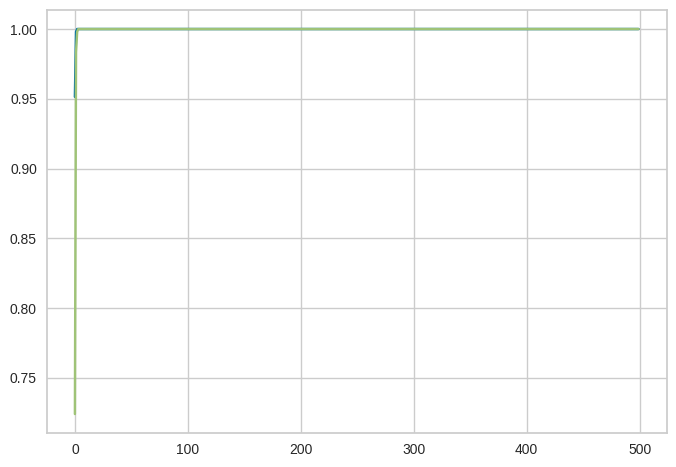

In [34]:
plt.plot(history.history['val_binary_accuracy'])
plt.plot(history.history['binary_accuracy'])

In [35]:
y_pred = np.round(model.predict(X_test)).flatten()

results['Neural Network'] = [accuracy_score(y_test, y_pred),
                             precision_score(y_test, y_pred, average='weighted'),
                             recall_score(y_test, y_pred, average='weighted'),
                             f1_score(y_test, y_pred, average='weighted'),
                             training_time]
print("Accuracy:", results['Neural Network'][0])
print("Precision:", results['Neural Network'][1])
print("Recall:", results['Neural Network'][2])
print("F1-score:", results['Neural Network'][3])
print("Training Time:", results['Neural Network'][4])

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Training Time: 323.9352648258209


## Model Result Comparison and Analysis 📈

In [36]:
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time'])

df_results

,Accuracy,Precision,Recall,F1-Score,Training Time
Logistic Regression,0.992667,0.992722,0.992667,0.992657,0.040001
K-Nearest Neighbors (KNN),0.961333,0.963767,0.961333,0.961549,0.386080
Decision Trees,1.000000,1.000000,1.000000,1.000000,0.121746
Random Forest,1.000000,1.000000,1.000000,1.000000,0.852047
Extra Trees,1.000000,1.000000,1.000000,1.000000,0.783073
Support Vector Machines,1.000000,1.000000,1.000000,1.000000,0.547423
Neural Networks (Multi-layer Perceptron),1.000000,1.000000,1.000000,1.000000,11.617570
AdaBoost,1.000000,1.000000,1.000000,1.000000,0.931497
XGBoost,1.000000,1.000000,1.000000,1.000000,8.296207
CatBoost,1.000000,1.000000,1.000000,1.000000,31.833113


## Analysing Best Performing Model - Linear Discriminant Analysis (LDA)

In [37]:
%%time
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Convert SparseTensor to dense numpy arrays
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Initialize Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()

# Train the classifier
start_time = time.time()
lda.fit(X_train_dense, y_train)
training_time = time.time() - start_time

# Predict on the test set
y_pred = lda.predict(X_test_dense)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Training Time:", training_time)


Accuracy: 0.9906666666666667
Precision: 0.9907830650972412
Recall: 0.9906666666666667
F1-score: 0.9906792563465785
Training Time: 3.8430850505828857
CPU times: user 6.74 s, sys: 648 ms, total: 7.39 s
Wall time: 3.92 s


In [38]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       599
           1       1.00      0.99      0.99       901

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



## Confusion Matrix-

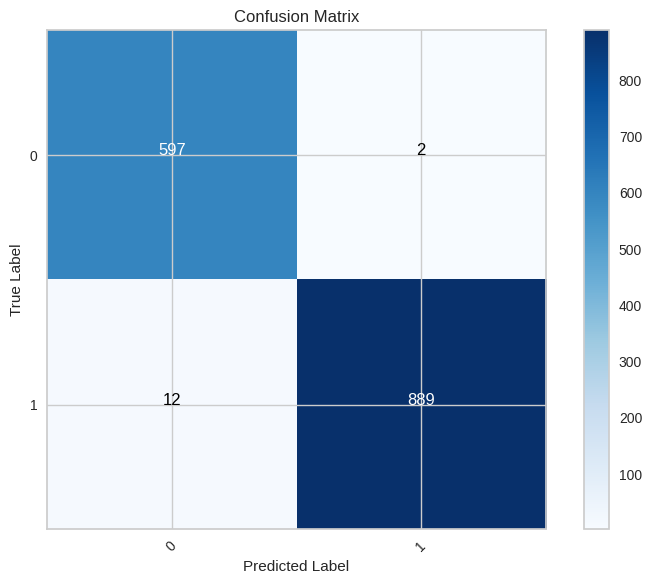

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
classes = ['0', '1']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Fill the cells of the confusion matrix with values
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

In [40]:
import numpy as np

# Iterate over each classifier
classifiers = {
    'Logistic Regression': logistic,
    'K-Nearest Neighbors (KNN)': knn,
    'Gaussian Naive Bayes': gnb,
    'Decision Trees': dt,
    'Random Forest': rf,
    'Extra Trees': et,
    'Support Vector Machines': svm,
    'Neural Networks (Multi-layer Perceptron)': mlp,
    'AdaBoost': ada,
    'XGBoost': xgboost,
    'LightGBM': lgbm,
    'CatBoost': cat,
    'Stochastic Gradient Descent (SGD)': sgd,
    'Linear Discriminant Analysis': lda,
    'Quadratic Discriminant Analysis': qda,
    'Neural Network': model
}

for name, classifier in classifiers.items():
    try:
        # Predict using the classifier
        if name == 'Neural Network':  # For neural network model
            # Convert SparseTensor to dense numpy arrays
            X_test_dense = X_test.toarray()
            y_pred = np.round(classifier.predict(X_test_dense)).flatten()
        elif name == 'LightGBM':
            # Predict using LightGBM model directly
            y_pred = classifier.predict(X_test)
        else:
            # Convert TF-IDF transformed sparse matrices to dense numpy arrays
            X_test_dense = X_test.toarray()
            y_pred = classifier.predict(X_test_dense)

        # Get indices of rows predicted as hate speech
        hate_speech_indices = np.where(y_pred == 1)[0]

        # Get the rows of speeches predicted as hate speech
        hate_speech_rows = df1.iloc[hate_speech_indices]

        # Display the hate speech rows
        print(f"Hate speech detected by {name} classifier:")
        print(hate_speech_rows)

        # Save the hate speech rows to a CSV file
        hate_speech_rows.to_csv(f"/content/drive/MyDrive/Colab Notebooks/{name}_hate_speech.csv", index=False)
    except AttributeError:
        print(f"AttributeError: Cannot predict using {name}.")


Hate speech detected by Logistic Regression classifier:
                                                 speech  class
3     Then we must castrate even Italians who rape, ...      1
4     The Arabs do not want to impose their religion...      1
6     Freedom of thought, conscience and religion me...      1
8                                           The idea of      1
11    The number of Muslims who have committed certa...      1
...                                                 ...    ...
1492  I personally have never met a Muslim who tried...      1
1493  There is no better way to spread the terrorism...      1
1495  What is your problem with Muslims? They are pe...      1
1496  Did you know that the only terrorist attacks i...      1
1499  Hi, I also condemn these acts that are so atro...      1

[910 rows x 2 columns]
Hate speech detected by K-Nearest Neighbors (KNN) classifier:
                                                 speech  class
3     Then we must castrate even Italia